<a href="https://colab.research.google.com/github/parklaus1078/dl_simple_practices/blob/main/dl_simple_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content

/content


In [3]:
%pwd

'/content'

# 제조 데이터의 분류기 실습
---
- sklearn의 model을 사용하여 Classifier를 학습한다.
- 생성한 Classifier의 성능 개선을 위한 방법을 이해한다.
- Classifier에서 사용가능한 주요 성능 지표를 이해한다.

# 문제: Binary Classification

In [10]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise1.csv")

In [11]:
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [12]:
df.shape

(1000, 7)

In [13]:
df["target"].unique()           # Target column's values

array([0, 1])

In [14]:
df["target"].value_counts()

0    588
1    412
Name: target, dtype: int64

# 데이터 탐색

In [15]:
# Data exploration
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


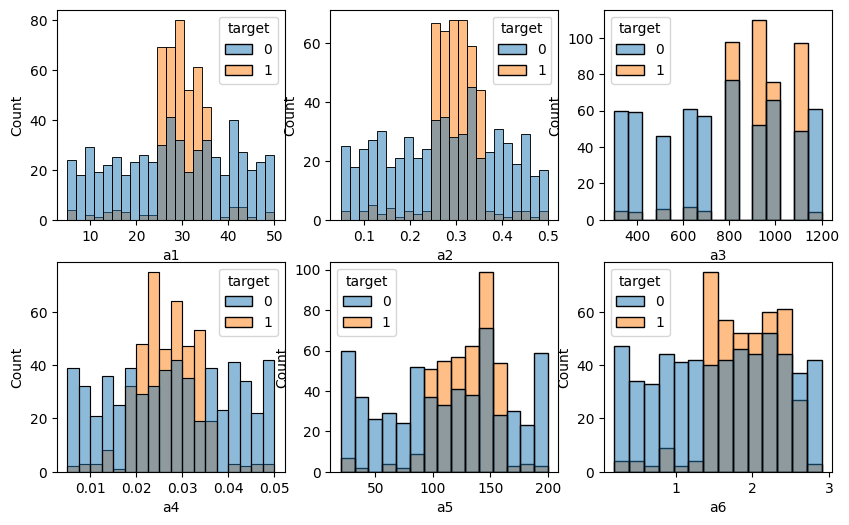

In [18]:
# Data Visualization
nrows, ncols = 2, 3                                                 # coordinate of plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)                   # plots are described in 2 x 3 formation
fig.set_size_inches(10, 6)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j], hue="target")

# 주요 코드
---
1. Split a dataset into trainset and test set
    - ```train_test_split```
2. Generate Model Instance
    - ```DecisionTreeClassifier```
3. train
    - ```.fit(X, y)```
        - X 를 y에 맞춘다.
4. Evaluate
    - Classifier's evaluation : Accuracy
    - ```accuracy_score()```

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Split data
X = df.iloc[:, :6]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Generate Model Instance
model = DecisionTreeClassifier(random_state=42)

# 3. Train
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

# 다른 분류기

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Split data
# splitted already

# 2. Generate Model Instance
rf_cls = RandomForestClassifier(random_state=42)
gb_cls = GradientBoostingClassifier(random_state=42)
xgb_cls = XGBClassifier(random_state=42)
lgb_cls = LGBMClassifier(random_state=42)

# 3. Train
rf_cls.fit(X_train, y_train)
gb_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
lgb_cls.fit(X_train, y_train)

# 4. Evaluate
y_pred_rf = rf_cls.predict(X_test)
y_pred_gb = gb_cls.predict(X_test)
y_pred_xgb = xgb_cls.predict(X_test)
y_pred_lgb = lgb_cls.predict(X_test)

print("Random Forest Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_rf)))
print("Gradident Boosting Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_gb)))
print("XGBoost Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_xgb)))
print("light gbm Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_lgb)))

[LightGBM] [Info] Number of positive: 330, number of negative: 470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412500 -> initscore=-0.353640
[LightGBM] [Info] Start training from score -0.353640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Quiz
다음과 같이 SVC를 사용하여 모델을 생성하고, 학습을 시켰을 때 모델의 정확도를 구하시오. 모델의 성능을 높이기 위해서 할 수 있는 방법은?

In [25]:
# 문제 지문
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)


0.72

In [26]:
# 해답 : 학습 데이터의 독립 변수들이 스케일이 다름. 스케일링을 해줘야함
X_train

,a1,a2,a3,a4,a5,a6
330,35,0.23,1100,0.034,40,2.1
535,35,0.29,800,0.028,110,2.4
154,39,0.29,300,0.041,140,1.8
210,23,0.14,1000,0.032,170,0.5
8,32,0.26,800,0.029,150,2.6
...,...,...,...,...,...,...
387,34,0.32,900,0.024,110,2.6
490,5,0.42,700,0.039,50,2.1
456,27,0.29,900,0.020,130,2.0
784,28,0.32,800,0.031,140,1.4


In [28]:
# 해법
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scale = sc.fit_transform(X)                           # 중요한 점: training set와 test set의 스케일링 기준이 같아야함. 방안: 전체 스케일링 후 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, stratify=y)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# 자전거 대여량 예측 모델 실습
---
- sklearn의 model을 사용하여 Regressor를 학습한다.
- 생성한 Regressor의 성능 개선을 위한 방법을 이해한다.
- Regressor에서 사용가능한 주요 성능 지표를 이해한다.

# 문제 정의
---
https://www.kaggle.com/c/bike-sharing-demand </br>
- Data Fields
    - **datetime** - hourly date + timestamp  
    - **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter
    - **holiday** - whether the day is considered a holiday
    - **workingday** - whether the day is neither a weekend nor holiday
    - **weather**
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - **temp** - temperature in Celsius
    - **atemp** - "feels like" temperature in Celsius
    - **humidity** - relative humidity
    - **windspeed** - wind speed
    - **casual** - number of non-registered user rentals initiated
    - **registered** - number of registered user rentals initiated
    - **count** - number of total rentals

In [6]:
# !pip install -q kaggle

In [8]:
# !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# !cp kaggle.json ~/.kaggle/

In [10]:
# !chmod 600 ~/.kaggle/kaggle.json

In [12]:
# ! kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.1MB/s]


In [14]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise2.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.shape

(10886, 12)

# 데이터 탐색


In [17]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='count', ylabel='Count'>

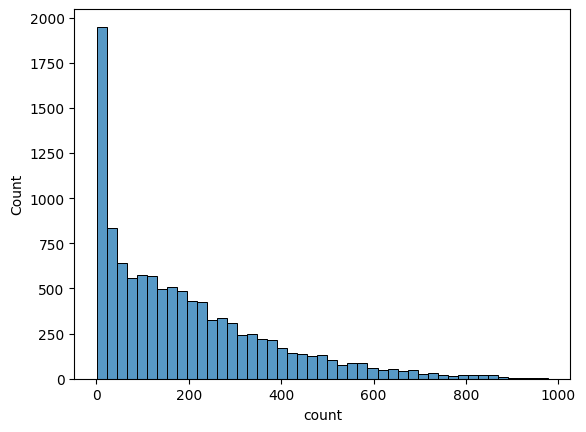

In [18]:
sns.histplot(x = df['count'])

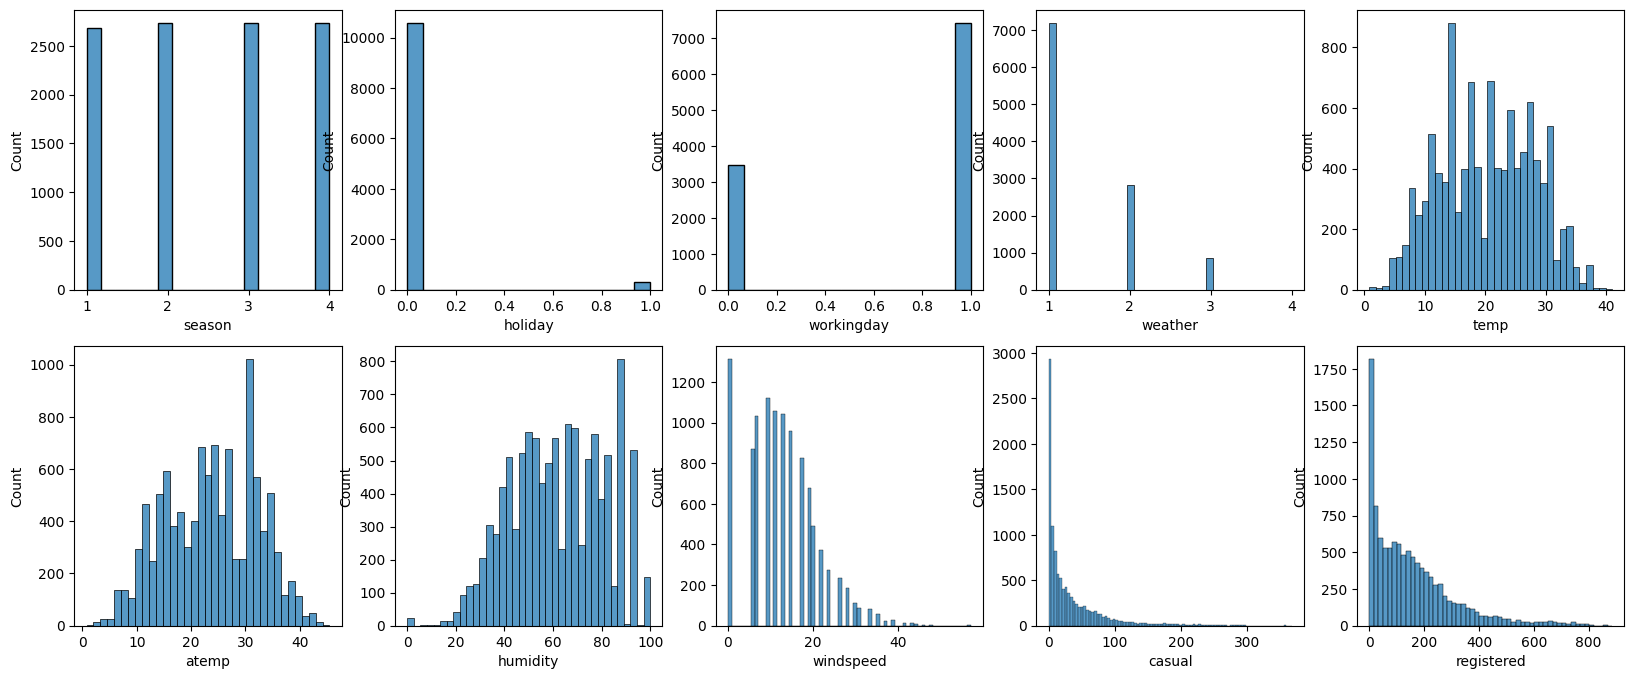

In [19]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20, 8)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j])

<ipython-input-20-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

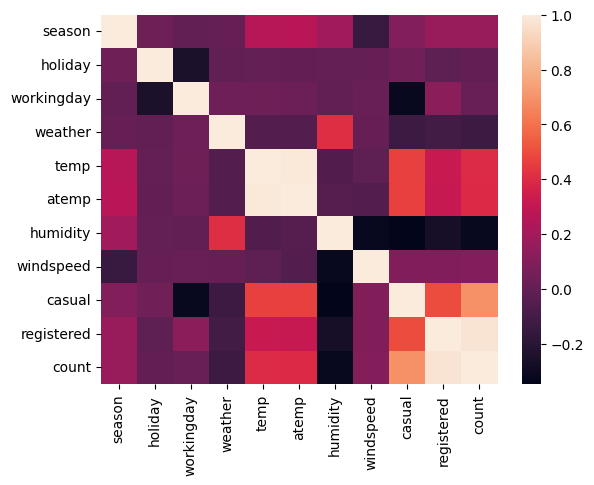

In [20]:
sns.heatmap(df.corr())                  # 숫자가 높을수록(색상이 연해질수록) 상관 관계가 높음

# 주요 코드 미리보기
---
1. Split Data
2. Generate Model Instance
3. Training
4. Evaluate

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

y = df["count"]
X = df.drop(["datetime", "count"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mean_squared_log_error(y_test, y_pred)

3.248909885621264e-29

<Axes: >

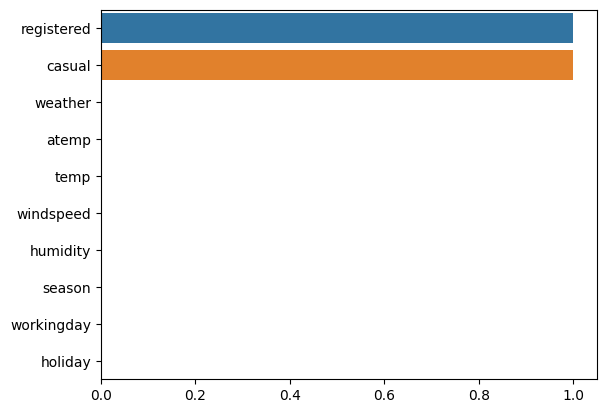

In [22]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
# registered, casual 피쳐가 count 값과 밀접한 관계가 있다.
# 하지만, 이 피쳐들은 말 그대로, 자전거를 대여한 비회원과 회원 수이고 둘의 합이 count이기 때문에 독립 변수로 사용할 수 없는 피쳐들이다. => 기각.

# 코드 개선
---
문제: 앞서 알아낸 것처럼, 상관계수를 따져보았을 때, registered 와 casual이라는 피쳐들이 count 값에 가장 큰 영향력을 행사한다는 것으로 추정했지만, 두 피쳐의 값들은 자전거를 대여한 비회원과 회원 수를 나타내는 값들이고, 그 둘의 합이 count 피쳐를 만들어내는 형태이기 때문에, 이 분석은 잘못되었다. 그렇다면, 분석을 개선하기 위하여 취하여야 할 행위는 무엇일까?
- Data 관점
    - 의미있는 feature 생성
    - 불필요한 feature 삭제
    - 데이터 형태 변환: scaling, encoding
- Model 관점
    - Linear Regressor
    - RandomForest Regressor
    - XGBRegressor
    - LGBMRgressor

# Data 관점

## 의미있는 feature 생성

In [23]:
df["datetime"] = df["datetime"].astype("datetime64")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## 불필요한 feature 삭제

In [24]:
df.drop(["datetime", "casual", "registered"], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 데이터 형태 변환
- y를 정규 분포로 변환
    - 왜? count의 히스토그램을 보았을 때, 정규 분포가 아니고 skewed 형태인데, 본디 머신러닝의 기본 전재는 "데이터가 정규 분포를 따른다."이다. 고로, 종속 변수를 정규 분포로 변환해주어야 한다.

<Axes: xlabel='count', ylabel='Count'>

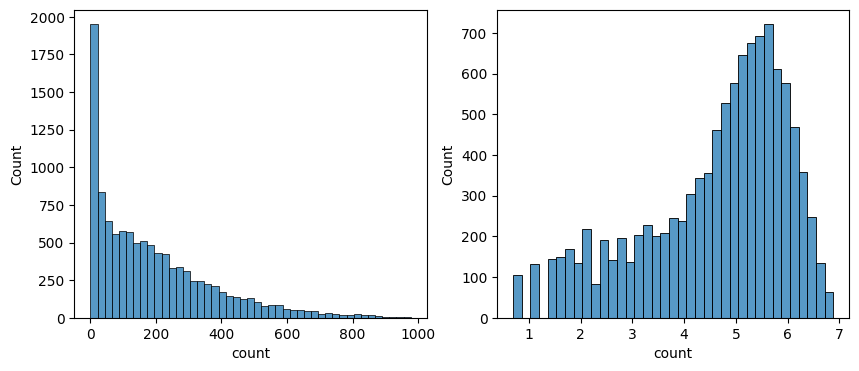

In [26]:
y_log = np.log1p(y)

nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10, 4)
sns.histplot(y, ax=axs[0])
sns.histplot(y_log, ax=axs[1])

- Categorical 변수 원핫 인코딩 : ```pd.get_dummies(df=데이터셋, columns=[범주형 변수 피쳐들])```

In [29]:
df = pd.get_dummies(df, columns=["year", "month", "day", "hour", "holiday", "workingday", "season", "weather"])

In [30]:
df.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [31]:
y = y_log
X = df.drop(["count"], axis=1, inplace=False)

- Z-score 변환

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))      # y 값들이 현재 로그 스케일링 되어있기 때문에 explonential 변환(e*)로 돌려놓음

0.3418249583393837

<Axes: >

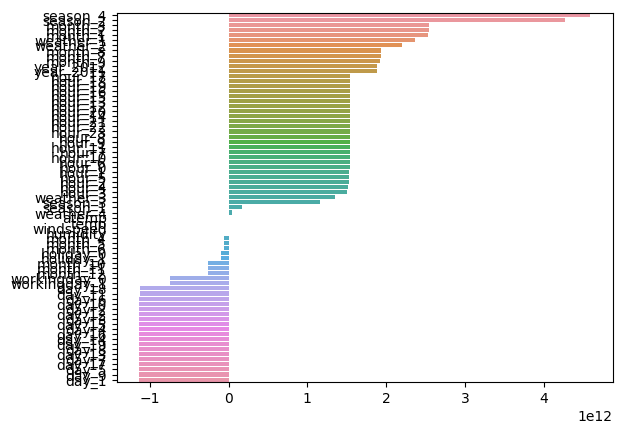

In [36]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort.head(10)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# Model 관점
- RandomForest
- XGBoost
- Light GBM

In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42, verbose=-1)

model_list = [lr_model, rf_model, xgb_model, lgbm_model]
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    m = model.__class__.__name__
    score = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
    print("{0} msle : {1:.3f}".format(m, score))
# light gbm has the least means squared log error value. light gbm shows the best performance

LinearRegression msle : 0.342
RandomForestRegressor msle : 0.125
XGBRegressor msle : 0.119
LGBMRegressor msle : 0.110
